In [43]:
import pickle
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
plt.style.use('science')

from pepsflow.iPEPS_trainer import iPEPSTrainer

In [44]:
lambda_values = [lam for lam in np.arange(0.1, 4, 0.25)]
chi_values = [2]
for chi in chi_values:
    trainer = iPEPSTrainer( chi = chi, d = 2, gpu=False)
    trainer.exe(lambda_values,tol=1e-8, max_epochs=50)
    trainer.save_data(fn = f"run4/chi{chi}")

100%|██████████| 16/16 [00:27<00:00,  1.72s/it]

Data saved to data\run4/chi2.pkl


In [56]:
data = pickle.load(open('data/run4/chi2.pkl', 'rb'))
print(data.keys())

dict_keys(['states', 'energies', 'lambdas', 'Mx', 'My', 'Mz', 'Mg', 'train_time'])


In [54]:
#lambda_values = [lam for lam in np.arange(0.1, 4.25, 0.25)]
chi_values = [4]
for chi in chi_values:
    trainer = iPEPSTrainer(chi = chi, d = 2, gpu=False, data_prev=data)
    trainer.exe(tol=1e-8, max_epochs=20)
    trainer.save_data(fn = f"run4/chi{chi}")

100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

Data saved to data\run4/chi2.pkl


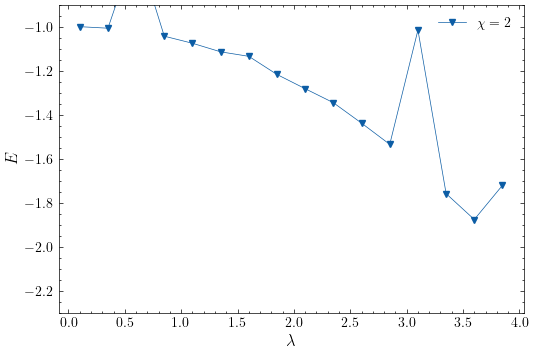

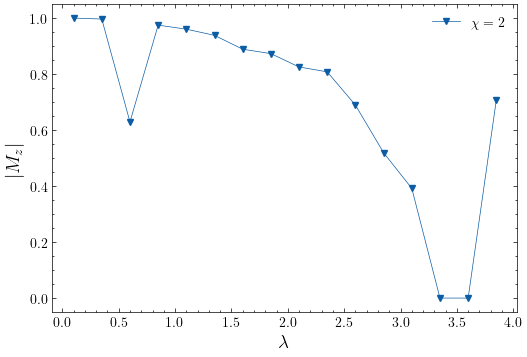

In [55]:
plt.figure(figsize=(6, 4))
for chi in [2 ]:
    with open(f"data/run4/chi{chi}.pkl", 'rb') as f:
        data = pickle.load(f)
    plt.plot(lambda_values, data["energies"], 'v-', markersize=4, linewidth=0.5, label=rf'$\chi = {chi}$')

plt.legend()
plt.ylim(-2.3, -0.9)
plt.xlabel(r"$\lambda$", fontsize=12)
plt.ylabel(r'$E$', fontsize=12)
plt.show()

plt.figure(figsize=(6, 4))
for chi in [2]:
    with open(f"data/run4/chi{chi}.pkl", 'rb') as f:
        data = pickle.load(f)
    plt.plot(lambda_values, abs(np.array(data['Mz'])), 'v-', markersize=4, linewidth=0.5, label=rf'$\chi = {chi}$')
plt.legend()
plt.xlabel(r"$\lambda$", fontsize=14)
plt.ylabel(r'$|M_z|$', fontsize=14)
plt.show()

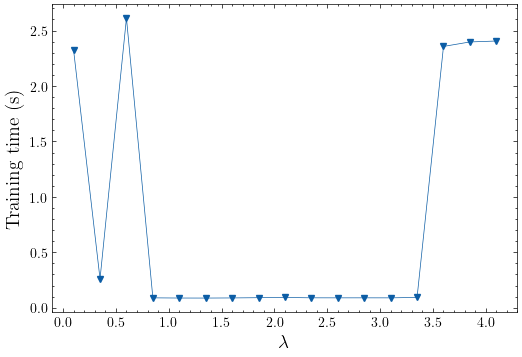

In [18]:
with open(f"data/run4/chi6.pkl", 'rb') as f:
    data = pickle.load(f)

plt.figure(figsize=(6, 4))
plt.plot(lambda_values,data["train_time"], 'v-', markersize=4, linewidth=0.5)
plt.xlabel(r"$\lambda$", fontsize=14)
plt.ylabel(r'Training time (s)', fontsize=14)
plt.show()

In [1]:
from pepsflow.models.tensors import Tensors

A = Tensors.A_random_symmetric()
a = Tensors.a(A)
C = Tensors.T_init(a)
C.shape

torch.Size([4, 4, 4])